In [1]:
import os 

# Change to the root directory of the project
if 'project1' in os.getcwd():
    os.chdir('..')

import numpy as np
import pandas as pd
from collections import OrderedDict
from data.parse import data, criteria, decision_classes, pairwise_comparisons

<div style="background-color: #990000; color: white; text-align: center">
    <h1>Data specification</h1>
</div>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Dataset questions</p>
</div>

1. What is the domain of the problem about?  
<p style="color: #993300">The domain problem is about ranking movies and selecting the best ones to watch </p>

2. What is the source of the data?  
<p style="color: #993300">Data was fetched from IMDB and Wikipedia.</p>  

3. What is the point of view of the decision maker?  
<p style="color: #993300">The decision maker is a movie lover who wants to watch the best movies.</p>

4. What is the number of alternatives considered? Were there more of them in the original data set?  
<p style="color: #993300">We have 31 alternatives. There is no particular "original" data set, but in general, there is a lot of movies out there. We've just selected some form the top of the imdb rankings and some in a more random fashion. </p>

5. Describe one of the alternatives considered (give its name, evaluations, specify preferences for this
alternative)
<p style="color: #993300">"The Godfather" is rated on 7 criteria being: Acting (10/10), Plot (5/5), Pictures (8/10), Music (5/5), Sentiment (1/1), Critics Score (9/10), Oscars Won (3/23)</p>

In [2]:
data

,Movie,Acting,Plot,Pictures,Music,Sentiment,Critics Score,Oscars Won
0,The Shawshank Redemption,9,5,8,4,1,9,7
1,The Godfather,10,5,8,5,1,9,3
2,The Dark Knight,9,4,9,5,1,8,2
3,Pulp Fiction,9,5,7,5,1,8,1
4,The Lord of the Rings: The Return of the King,9,5,10,5,1,9,11
5,Schindler's List,10,5,8,4,1,9,7
6,Inception,9,4,10,5,1,8,4
7,Fight Club,10,4,9,5,1,8,1
8,Forrest Gump,9,4,7,4,1,8,6
9,The Matrix,9,4,8,5,1,8,4


6. What is the number of criteria considered? Were there more of them in the original data set?  
<p style="color: #993300">We have 7 criteria. Since there is no particular "original" data set, we can't say if there were more criteria in the original data set. </p>


7. What is the origin of the various criteria? (catalog parameter / created by the decision maker - how?)  
<p style="color: #993300">The criteria were created by the decision maker (us). We've selected the criteria that we think correlate with a movie being considered good. </p>


8. What are the domains of the individual criteria (discrete / continuous)? Note: in the case of continuous
domains, specify the range of the criterion’s variability, in the case of others: list the values. What is
the nature (gain / cost) of the individual criteria?  

In [3]:
criteria

,Criterion,Description,Value Type,Min Value,Max Value,Direction
0,Acting,Quality of performances by the cast,Discrete,1,10,gain
1,Plot,Depth and engagement of the storyline,Discrete,1,5,gain
2,Pictures,Cinematography and visual aesthetics,Discrete,1,10,gain
3,Music,Quality and impact of the soundtrack,Discrete,1,5,gain
4,Sentiment,Overall sentiment conveyed by the movie,Discrete,0,1,gain
5,Critics Score,Average score assigned by critics,Continuous,1,10,gain
6,Oscars Won,Total number of Oscars won by the movie,Discrete,0,23,gain


9. Are all criteria of equal importance (should they have the same ”weights”)? If not, can the relative
importance of the criteria under consideration be expressed in terms of weights? In this case, estimate
the weights of each criterion on a scale of 1 to 10. Are there any criteria among the criteria that are
completely or almost invalid / irrelevant?  

<p style="color: #993300">The criteria are not of equal importance. We can assign our subjective relative importance of the criteria can be expressed in terms of weights.</p>

In [4]:
CRITERIA_WEIGHTS = OrderedDict({
    'Acting': 7,
    'Plot': 3,
    'Pictures': 9,
    'Music': 8,
    'Sentiment': 2,
    'Critics Score': 5,
    'Oscars Won': 10
})

10. Are there dominated alternatives among the considered data set? If so, present all of them (dominating
and dominated alternative), giving their names and values on the individual criteria.  



In [5]:
from EasyMCDM.models.Pareto import Pareto
data_np = data.to_numpy()

p = Pareto(data_np, verbose=True)
res = p.solve(indexes=range(0, 7), prefs=['max']*7)

nondominated = [mov for mov in res if len(res[mov]['Dominated-by']) == 0]
dominated = [mov for mov in res if len(res[mov]['Dominated-by']) > 0]

print('Non-dominated alternatives:')
print(nondominated)
    
print('Dominated alternatives:')
print(dominated)


Non-dominated alternatives:
['The Lord of the Rings: The Return of the King', "Schindler's List", 'The Godfather Part II', 'The Prestige']
Dominated alternatives:
['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'Pulp Fiction', 'Inception', 'Fight Club', 'Forrest Gump', 'The Matrix', 'Se7en', 'Gladiator', 'Dune 2', 'Shutter Island', 'Whiplash', 'The Silence of the Lambs', 'The Green Mile', 'Goodfellas', 'The Departed', 'Catwoman', 'Batman & Robin', 'Gigli', 'The Room', 'Jack and Jill', 'Birdemic: Shock and Terror', 'Battlefield Earth', 'Superbabies: Baby Geniuses 2', 'Fifty Shades of Grey', 'Transformers: Revenge of the Fallen', 'Foodfight!']


11. What should the theoretically best alternative look like in your opinion? Is it a small advantage on
many criteria, or rather a strong advantage on few (but key) criteria? Which?  
<p style="color: #993300">The theoretically best alternative should have a strong advantage on few (but key) criteria. The key criteria are the ones that we consider to be the most important. However, I think that in our case, the best alternative would just excel in all criteria, since they all pertain to the quality of the movie. </p>



12. Which of the considered alternatives (provide name and values on individual criteria) seems to be the
best / definitely better than the others? Is it determined by one reason (e.g. definitely the lowest
price) or rather the overall value of the criteria? Does this alternative still have any weaknesses?  
<p style="color: #993300">There is a couple of really strong movies in our data set. `The Godfather` is one of them. It has a really high score in all criteria except Oscars Won, where they "only" won 3 Oscars, which is not a huge amount for the best movies that exist. `The Lord of the Rings: The Return of the King` is another one, it excels an all criteria, but has an exceptionally high number of Oscars won - 11, which distinguishes it from others. </p>


13. Which of the considered alternatives (provide name and values on individual criteria) seems to be the
worst / definitely worse than the others? Is it determined by one reason (e.g. definitely the highest
price), or rather the overall value of the criteria? Does this alternative still have any strengths?
<p style="color: #993300">The worst movie in our data set is `The Room`, `Birdemic: Shock and Terror` and `Foodfight!`. They all share the lowest scores possible in all criteria, which definitely says something about their quality. (However, <a href="https://www.youtube.com/watch?v=LrxZblVUkMU"> Birdemic is kind of a masterpiece! </a> )  </p>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Decision classes</p>
</div>

In [6]:
decision_classes

,Decision class
0,Must watch
1,Good movie
2,Meh
3,Maybe
4,Skip


<div style="background-color: #999900; color: white; text-align: center">
    <p>Pairwise comparisons</p>
</div>

In [7]:
pairwise_comparisons

,name1,name2,relation
0,The Godfather,Forrest Gump,better
1,Catwoman,The Prestige,worse
2,Inception,Pulp Fiction,better
3,Batman & Robin,The Dark Knight,worse
4,Whiplash,The Dark Knight,better


<div style="background-color: #990000; color: white; text-align: center">
    <h1>PROMETHEE</h1>
</div>

In [8]:
from project1.promethee.preference_functions import CriterionType, VShapeWithIndifference, UShape, MarginalPreferenceMatrix, ComprehensivePreferenceIndex, PrometheeI, PrometheeII

PROMETHEE_SAVE_DIR = 'results/promethee' # Directory to save the marginal preference matrices, just for debugging and analysis
os.makedirs(PROMETHEE_SAVE_DIR, exist_ok=True) 

<div style="background-color: #999900; color: white; text-align: center">
    <p>Hyperparams</p>
</div>

In [9]:
# TODO: Select more preference functions for each criterion so that they make more sense
pfunction1 = VShapeWithIndifference(2.0, 2.5, CriterionType.GAIN)
pfunction2 = VShapeWithIndifference(1.0, 1.5, CriterionType.GAIN)
sentiment_pfunction = UShape(0.5, None, CriterionType.GAIN)

FUNCTIONS_FOR_CRITERIA = {
    'Acting': pfunction1,
    'Plot': pfunction2,
    'Pictures': pfunction1,
    'Music': pfunction2,
    'Sentiment': sentiment_pfunction,
    'Critics Score': pfunction1,
    'Oscars Won': pfunction1
}

<div style="background-color: #999900; color: white; text-align: center">
    <p>Marginal preference matrices for each criterion</p>
</div>

In [10]:
marg_matrices = []
weights = []
for criterion in criteria['Criterion']:
    matrix = MarginalPreferenceMatrix(data[criterion], pfunction1, names=data['Movie'])
    matrix.save(f'{PROMETHEE_SAVE_DIR}/{criterion}_matrix.csv')
    marg_matrices.append(matrix)
    weights.append(CRITERIA_WEIGHTS[criterion])

# Comprehensive preference index
cpi = ComprehensivePreferenceIndex(marg_matrices, weights)
cpi.save(f'{PROMETHEE_SAVE_DIR}/cpi.csv')
cpi.get_as_dataframe().head(3)

Movie,The Shawshank Redemption,The Godfather,The Dark Knight,Pulp Fiction,The Lord of the Rings: The Return of the King,Schindler's List,Inception,Fight Club,Forrest Gump,The Matrix,...,Batman & Robin,Gigli,The Room,Jack and Jill,Birdemic: Shock and Terror,Battlefield Earth,Superbabies: Baby Geniuses 2,Fifty Shades of Grey,Transformers: Revenge of the Fallen,Foodfight!
Movie,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,0.0,0.227273,0.227273,0.227273,0.0,0.0,0.227273,0.227273,0.0,0.227273,...,0.772727,0.772727,0.954545,0.772727,0.954545,0.772727,0.954545,0.772727,0.772727,0.954545
The Godfather,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.545455,0.954545,0.954545,0.954545,0.954545,0.954545,0.954545,0.772727,0.772727,0.954545
The Dark Knight,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.477273,0.727273,0.727273,0.659091,0.727273,0.659091,0.727273,0.477273,0.477273,0.727273


<div style="background-color: #999900; color: white; text-align: center">
    <p>Calculating Promethee I partial and complete ranking</p>
</div>

Positive ranking


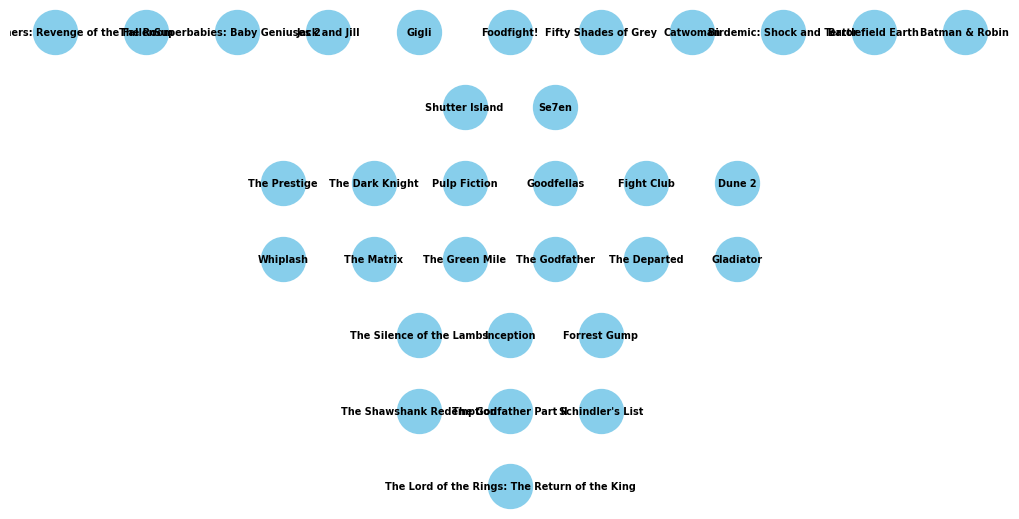

In [11]:
# Create ranking
promethee1 = PrometheeI(cpi)

print('Positive ranking')
promethee1.plot_ranking(type='positive', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_positive.png', show=True)

Negative ranking


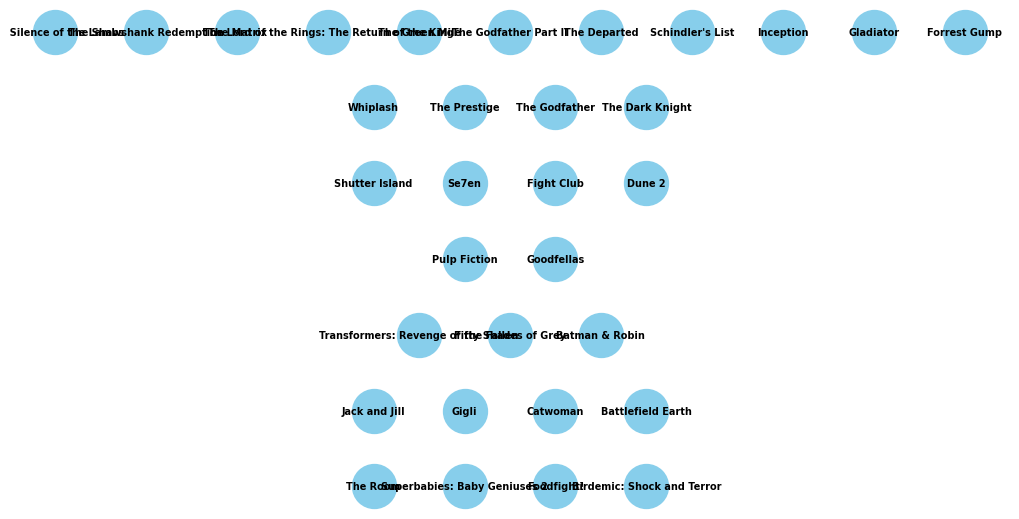

In [12]:
print('Negative ranking')
promethee1.plot_ranking(type='negative', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_negative.png', show=True)

Complete ranking


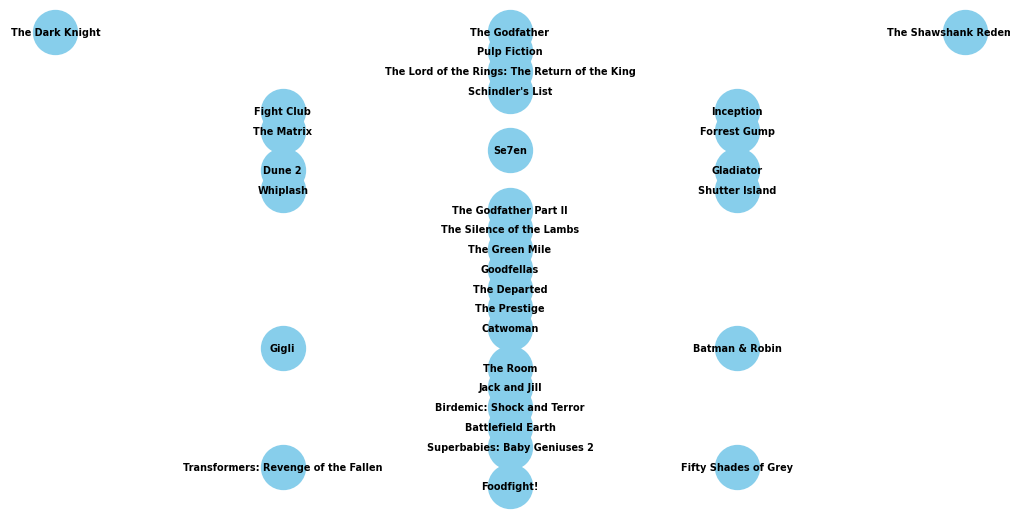

In [13]:
print('Complete ranking')
promethee1.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_overall.png', show=True)

<p style="color: #992200"> Comment on the complete vs partial ranking: As we can see the complete ranking is more granular than the partial rankings (both positive and negative). Which probably is a good thing because it gives us more information about the alternatives and makes it easier to make a decision. </p>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Calculating Promethee II partial and complete ranking</p>
</div>

Positive ranking


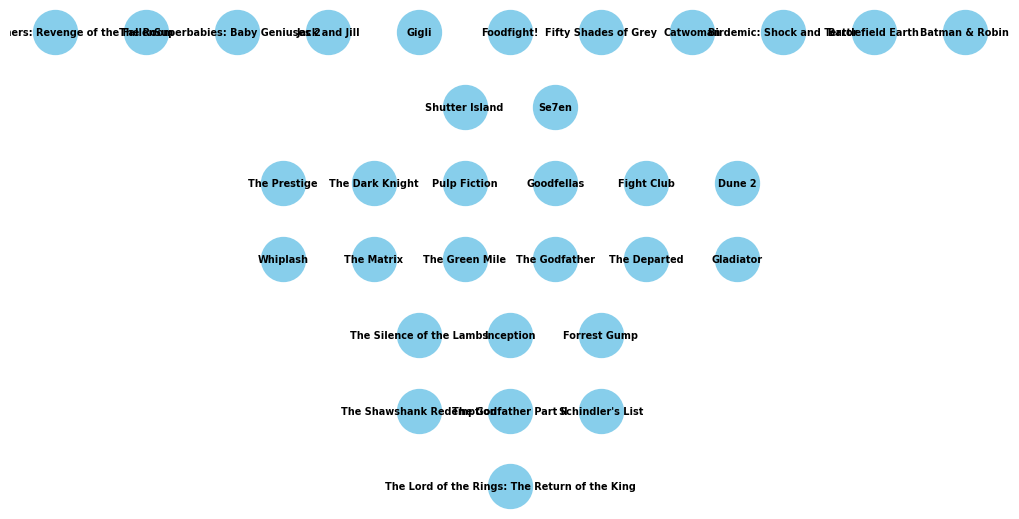

In [14]:
# Do the same for Promethee II
promethee2 = PrometheeII(cpi)
print('Positive ranking')
promethee2.plot_ranking(type='positive', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_positive.png', show=True)

Negative ranking


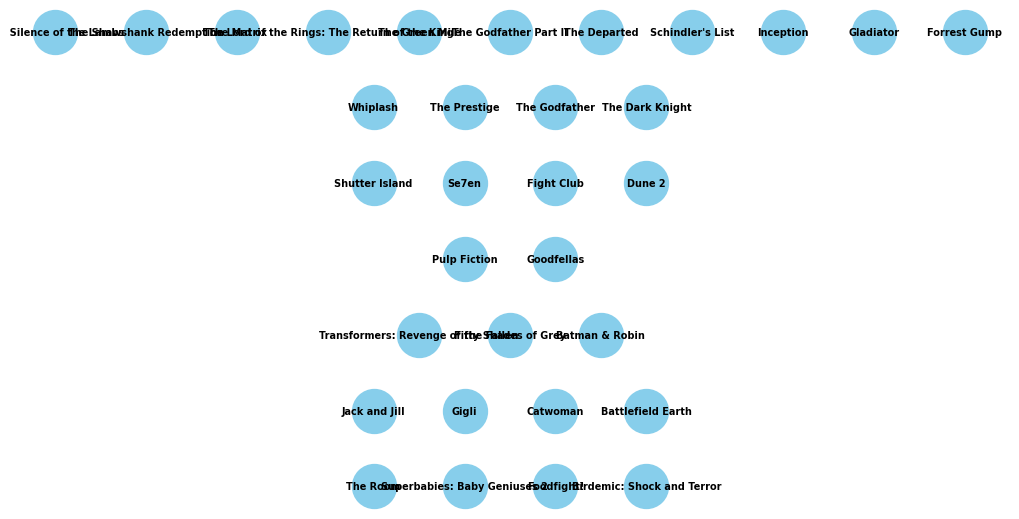

In [15]:
print('Negative ranking')
promethee2.plot_ranking(type='negative', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_negative.png', show=True)

Complete ranking


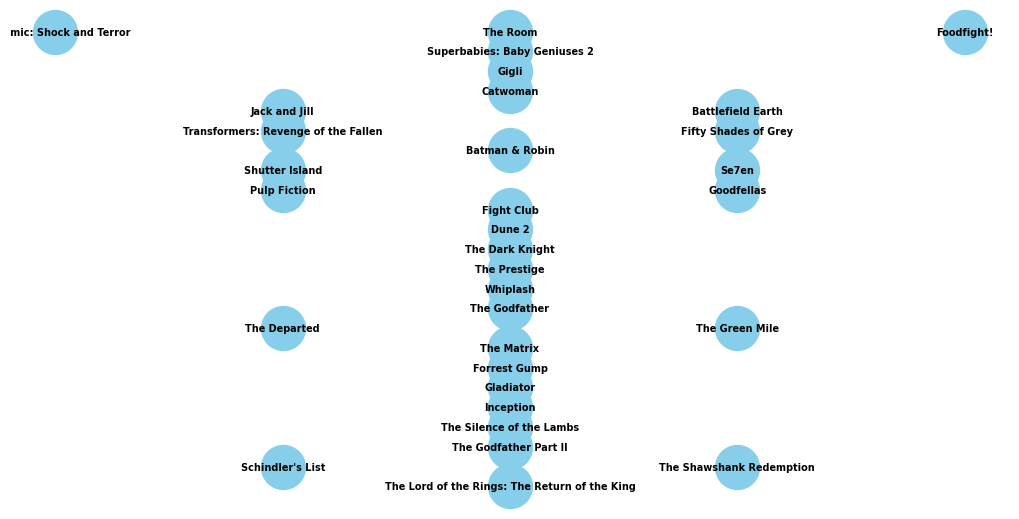

In [16]:
print('Complete ranking')
promethee2.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_overall.png', show=True)

<div style="background-color: #999900; color: white; text-align: center">
    <p>Comparison to prior</p>
</div>

In [17]:
# Check if pairwise comparisons are consistent with promethee ranking
pairwise_comparisons

,name1,name2,relation
0,The Godfather,Forrest Gump,better
1,Catwoman,The Prestige,worse
2,Inception,Pulp Fiction,better
3,Batman & Robin,The Dark Knight,worse
4,Whiplash,The Dark Knight,better


In [18]:
prometheeI_ranking = promethee1.overall_ranking

compliance = 0

for i, row in pairwise_comparisons.iterrows():
    mov1 = row['name1']
    mov2 = row['name2']
    relation = row['relation']
    
    if relation == 'better':
        if prometheeI_ranking[mov1] > prometheeI_ranking[mov2]: # Lower rank is better
            print(f'Correct: {mov1} is better than {mov2}')
            compliance += 1
        else:
            print(f'Incorrect: {mov1} is better than {mov2}')
    elif relation == 'worse':
        if prometheeI_ranking[mov1] < prometheeI_ranking[mov2]: # Lower rank is better
            print(f'Correct: {mov1} is worse than {mov2}')
            compliance += 1
        else:
            print(f'Incorrect: {mov1} is worse than {mov2}')
            
print(f'Compliance with prior user pairwise comparisions : {compliance}/{len(pairwise_comparisons)}')

Incorrect: The Godfather is better than Forrest Gump
Incorrect: Catwoman is worse than The Prestige
Correct: Inception is better than Pulp Fiction
Incorrect: Batman & Robin is worse than The Dark Knight
Correct: Whiplash is better than The Dark Knight
Compliance with prior user pairwise comparisions : 2/5


<p style="color: #992200"> 
We have adjusted the weights of the criteria to better reflect our subjective opinion of the importance of the criteria. The compliance to the prior is only 2/5. However, if we look actually why, we can see that those alternatives that were ranked differently than we expected, were really close to each other. While indeed the ranking doesn't reflect our prior perfectly, it is absolutely not far off, and actually it might even reflect our view on the facts than the prior after we thought about it. </p> 

<p style="color: #992200">
If we look at the movies we mentioned as top movies in the data set, `The Godfather` and `The Lord of the Rings: The Return of the King`, they are ranked as 1st and 10th in the complete ranking, which is surprising. However, we know that the former excels on all criteria, but the latter slacks in Oscars Won. This is a good example of how the ranking can be surprising, but still make sense. </p>

<p style="color: #992200">
As for our worst movies, `The Room`, `Birdemic: Shock and Terror` and `Foodfight!`, they are ranked as the worst movies in the data set, which is expected. </p>

<div style="background-color: #990000; color: white; text-align: center">
    <h1>ELECTRE</h1>
</div>

In [19]:
from project1.electre.electre import *

In [20]:
data.head(2)

,Movie,Acting,Plot,Pictures,Music,Sentiment,Critics Score,Oscars Won
0,The Shawshank Redemption,9,5,8,4,1,9,7
1,The Godfather,10,5,8,5,1,9,3


In [21]:
criteria

,Criterion,Description,Value Type,Min Value,Max Value,Direction
0,Acting,Quality of performances by the cast,Discrete,1,10,gain
1,Plot,Depth and engagement of the storyline,Discrete,1,5,gain
2,Pictures,Cinematography and visual aesthetics,Discrete,1,10,gain
3,Music,Quality and impact of the soundtrack,Discrete,1,5,gain
4,Sentiment,Overall sentiment conveyed by the movie,Discrete,0,1,gain
5,Critics Score,Average score assigned by critics,Continuous,1,10,gain
6,Oscars Won,Total number of Oscars won by the movie,Discrete,0,23,gain


In [22]:
np.array([i * criteria['Max Value'] / 5 for i in range(1,5)]).astype(int)

array([[ 2,  1,  2,  1,  0,  2,  4],
       [ 4,  2,  4,  2,  0,  4,  9],
       [ 6,  3,  6,  3,  0,  6, 13],
       [ 8,  4,  8,  4,  0,  8, 18]])

<div style="background-color: #999900; color: white; text-align: center">
    <p>First set of parameters (first iteration?)</p>
</div>

In [23]:
boundary_profiles = pd.DataFrame(np.array([  [ 2,  1,  2,  1,  0,  2,  4],
                [ 4,  2,  4,  2,  0,  4,  9],
                [ 6,  3,  6,  3,  1,  6, 13],
                [ 8,  4,  8,  4,  1,  8, 18]]))

# I feel indifferent when the difference is X
INDIFFERENCE_THRESHOLDS = [
    [1, 1, 1, 1, 1, 1, 1],
    [2, 1, 1, 1, 1, 1, 2],
    [3, 1, 1, 1, 1, 1, 3],
    [4, 1, 1, 1, 1, 1, 4],
]
# I feel preference when the difference is X
PREFERENCE_THRESHOLDS = [
    [2, 2, 2, 2, 1, 2, 2],
    [3, 2, 3, 2, 1, 3, 3],
    [4, 3, 3, 3, 1, 4, 4],
    [5, 3, 4, 3, 1, 7, 5],
]
# A is always better than B if the difference is X and there is no question about that
VETO_THRESHOLDS = [
    [6, 4, 6, 5, 10, 8, 6],
    [7, 4, 6, 5, 10, 8, 6],
    [8, 4, 6, 5, 10, 9, 7],
    [9, 4, 6, 5, 10, 9, 7],
]
gain = [x == 'gain' for x in criteria['Direction']]

WEIGHTS = [x for x, y in CRITERIA_WEIGHTS.items()]
boundary_profiles.columns = criteria['Criterion'].to_list()

In [24]:
alternatives = data.drop(columns=['Movie']).astype(float)
gain = [x == 'gain' for x in criteria['Direction']]
weights = [float(y) for x, y in CRITERIA_WEIGHTS.items()]

classes_pes = electre_tri_b(alternatives,
    boundary_profiles,
    gain,
    INDIFFERENCE_THRESHOLDS,
    PREFERENCE_THRESHOLDS,
    VETO_THRESHOLDS,
    weights,
    pessimistic=True
)
classes_pos = electre_tri_b(alternatives,
    boundary_profiles,
    gain,
    INDIFFERENCE_THRESHOLDS,
    PREFERENCE_THRESHOLDS,
    VETO_THRESHOLDS,
    weights,
    pessimistic=False
)

<div style="background-color: #999900; color: white; text-align: center">
    <p>ELECTRE class assignment for the first set of parameters</p>
</div>

In [25]:
electre_data = data.copy()
electre_data['electre_class_pes'] = classes_pes
electre_data['electre_class_pos'] = classes_pos
electre_data[['Movie', 'electre_class_pes', 'electre_class_pos']]

,Movie,electre_class_pes,electre_class_pos
0,The Shawshank Redemption,5,5.0
1,The Godfather,5,5.0
2,The Dark Knight,5,5.0
3,Pulp Fiction,5,5.0
4,The Lord of the Rings: The Return of the King,5,5.0
5,Schindler's List,5,5.0
6,Inception,5,5.0
7,Fight Club,5,5.0
8,Forrest Gump,5,5.0
9,The Matrix,5,5.0


Pessimistic ELECTRE classes
5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 2 2 2 2 2 3 3 2 


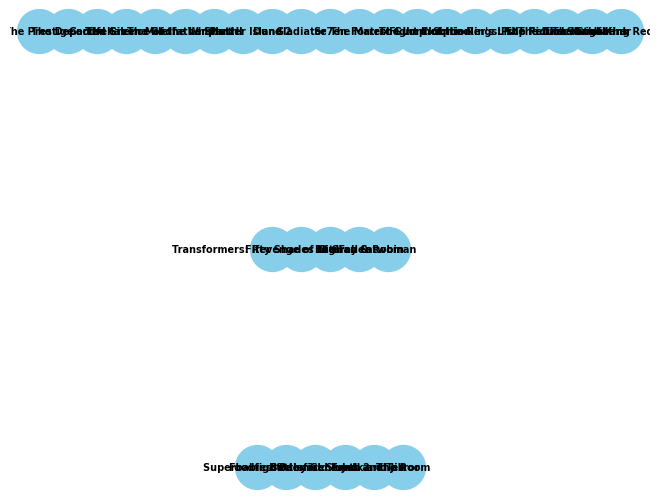

In [26]:
print('Pessimistic ELECTRE classes')    
plot_electre_classes(electre_data, 'electre_class_pes')

Optimistic ELECTRE classes
5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 2 2 2 2 2 3 3 2 


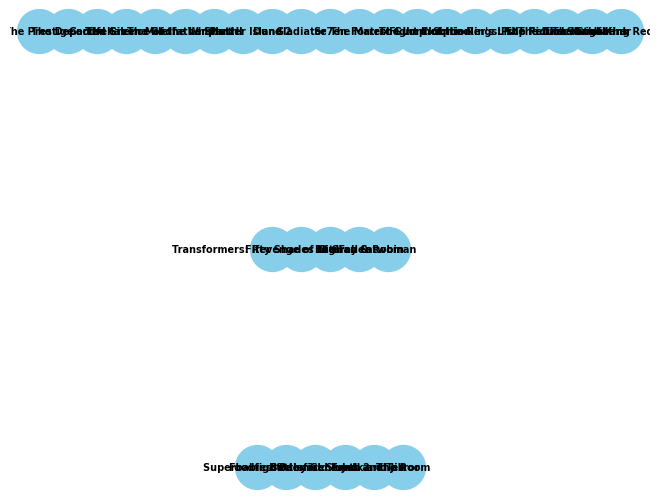

In [27]:
print('Optimistic ELECTRE classes')
plot_electre_classes(electre_data, 'electre_class_pos')

<div style="background-color: #999900; color: white; text-align: center">
    <p>Compliance with prior pairwise comparisons</p>
</div>

In [28]:
for pos_or_pes in ['pos', 'pes']:
    print(f'Checking compliance with ELECTRE-{pos_or_pes}')
    compliance = 0
    for i, row in pairwise_comparisons.iterrows():
        mov1 = row['name1']
        mov2 = row['name2']
        relation = row['relation']
        
        class1 = electre_data.loc[electre_data["Movie"] == mov1][f"electre_class_{pos_or_pes}"].values[0]
        class2 = electre_data.loc[electre_data["Movie"] == mov2][f"electre_class_{pos_or_pes}"].values[0]
        
        if relation == 'better':
            if class1 > class2:
                compliance += 1
        elif relation == 'worse':
            if class1 < class2:
                compliance += 1
             
    print(f'Compliance with prior user pairwise comparisions : {compliance}/{len(pairwise_comparisons)}')

Checking compliance with ELECTRE-pos
Compliance with prior user pairwise comparisions : 2/5
Checking compliance with ELECTRE-pes
Compliance with prior user pairwise comparisions : 2/5


<p style="color: #992200">
The compliance with the prior pairwise comparisons is 2/5. This is not a great result, but it is not a terrible one either. We need to change some parameters to create a better ranking. Also, we don't even use all the decision classes we defined, which is not optimal. </p>

<div style="background-color: #999900; color: white; text-align: center">
    <p>Second set of parameters (second iteration?)</p>
</div>

In [29]:
criteria

,Criterion,Description,Value Type,Min Value,Max Value,Direction
0,Acting,Quality of performances by the cast,Discrete,1,10,gain
1,Plot,Depth and engagement of the storyline,Discrete,1,5,gain
2,Pictures,Cinematography and visual aesthetics,Discrete,1,10,gain
3,Music,Quality and impact of the soundtrack,Discrete,1,5,gain
4,Sentiment,Overall sentiment conveyed by the movie,Discrete,0,1,gain
5,Critics Score,Average score assigned by critics,Continuous,1,10,gain
6,Oscars Won,Total number of Oscars won by the movie,Discrete,0,23,gain


In [30]:
boundary_profiles = pd.DataFrame(np.array([  
                [ 3,  4,  3,  2,  0,  2,  2],
                [ 3,  5,  3,  3,  0,  3,  2],
                [ 5,  5,  6,  5,  0,  6, 3],
                [ 10, 5,  10,  5,  1,  10, 8]]))
# I feel indifferent when the difference is X
INDIFFERENCE_THRESHOLDS = [
    [1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 1, 1],
]
# I feel preference when the difference is X
PREFERENCE_THRESHOLDS = [
    [2, 2, 2, 2, 1, 2, 2],
    [2, 2, 2, 2, 1, 2, 2],
    [2, 2, 2, 3, 1, 2, 2],
    [2, 2, 2, 3, 1, 2, 2],
]
# A is always better than B if the difference is X and there is no question about that
VETO_THRESHOLDS = [
    [6, 4, 6, 5, 10, 8, 6],
    [7, 4, 6, 5, 10, 8, 6],
    [8, 4, 6, 5, 10, 9, 6],
    [9, 4, 6, 5, 10, 9, 6],
]
gain = [x == 'gain' for x in criteria['Direction']]

WEIGHTS = [x for x, y in CRITERIA_WEIGHTS.items()]
boundary_profiles.columns = criteria['Criterion'].to_list()

In [31]:
classes_pes = electre_tri_b(alternatives,
    boundary_profiles,
    gain,
    INDIFFERENCE_THRESHOLDS,
    PREFERENCE_THRESHOLDS,
    VETO_THRESHOLDS,
    weights,
    pessimistic=True
)
classes_pos = electre_tri_b(alternatives,
    boundary_profiles,
    gain,
    INDIFFERENCE_THRESHOLDS,
    PREFERENCE_THRESHOLDS,
    VETO_THRESHOLDS,
    weights,
    pessimistic=False
)

In [32]:
electre_data2 = data.copy()
electre_data2['electre_class_pes'] = classes_pes.astype(int)
electre_data2['electre_class_pos'] = classes_pos.astype(int)
electre_data2[['Movie', 'electre_class_pes', 'electre_class_pos']]

,Movie,electre_class_pes,electre_class_pos
0,The Shawshank Redemption,5,5
1,The Godfather,4,4
2,The Dark Knight,5,5
3,Pulp Fiction,4,4
4,The Lord of the Rings: The Return of the King,5,5
5,Schindler's List,5,5
6,Inception,5,5
7,Fight Club,5,5
8,Forrest Gump,4,4
9,The Matrix,4,4


Pessimistic ELECTRE classes
5 4 5 4 5 5 5 5 4 4 4 5 4 5 4 4 4 4 4 4 5 2 3 2 1 2 1 3 2 3 3 1 


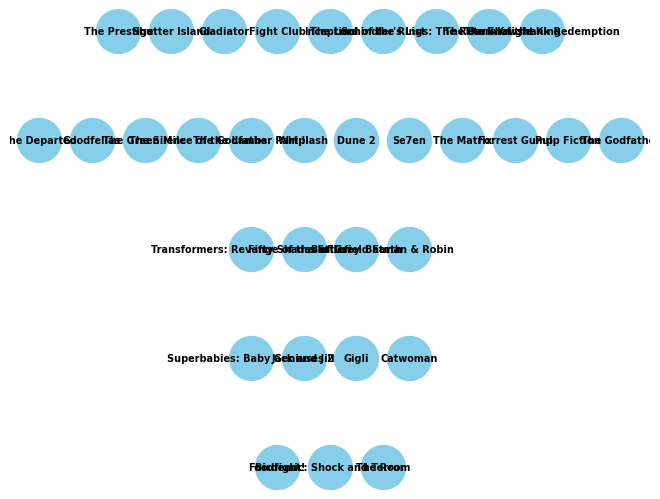

In [33]:
print('Pessimistic ELECTRE classes')    
plot_electre_classes(electre_data2, 'electre_class_pes')

Optimistic ELECTRE classes
5 4 5 4 5 5 5 5 4 4 4 5 4 5 4 4 4 4 4 4 5 2 3 2 1 2 1 3 2 3 3 1 


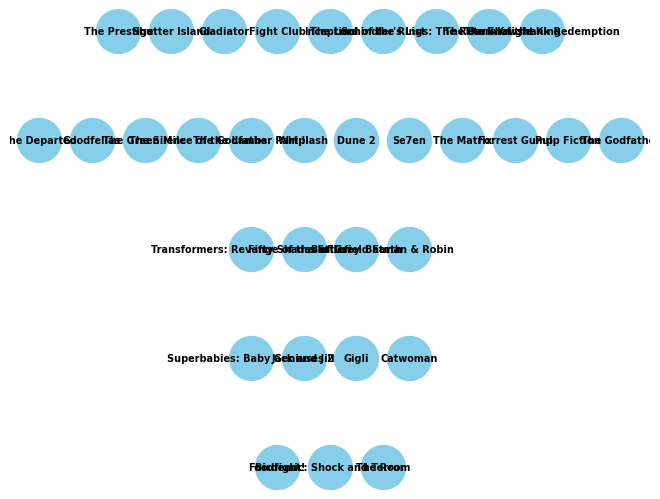

In [34]:
print('Optimistic ELECTRE classes')
plot_electre_classes(electre_data2, 'electre_class_pos')

In [35]:
for pos_or_pes in ['pos', 'pes']:
    print(f'Checking compliance with ELECTRE-{pos_or_pes}')
    compliance = 0
    for i, row in pairwise_comparisons.iterrows():
        mov1 = row['name1']
        mov2 = row['name2']
        relation = row['relation']
        
        class1 = electre_data2.loc[electre_data2["Movie"] == mov1][f"electre_class_{pos_or_pes}"].values[0]
        class2 = electre_data2.loc[electre_data2["Movie"] == mov2][f"electre_class_{pos_or_pes}"].values[0]
        
        if relation == 'better':
            if class1 > class2:
                compliance += 1
        elif relation == 'worse':
            if class1 < class2:
                compliance += 1
             
    print(f'Compliance with prior user pairwise comparisions : {compliance}/{len(pairwise_comparisons)}')

Checking compliance with ELECTRE-pos
Compliance with prior user pairwise comparisions : 3/5
Checking compliance with ELECTRE-pes
Compliance with prior user pairwise comparisions : 3/5


<p style="color: #992200"> We have adjusted the thresholds to make the decision classes well-spread and a bit more realistic. For example, we've worked on boundary profiles so that they actually make sense in our scenario. The compliance to the prior is 3/5. This is a better result than the first set of parameters, but it is still not perfect. Moreover, we've managed to use all the decision classes we defined, which is a good thing and the ranking is more granular and seems to be much more informative. </p>


<p style="color: #992200"> Optimistic and pessimistic class assignments are the same </p>

<p style="color: #992200"> In the introduction, we've mentioned two alternatives that are really strong in our data set. `The Godfather` and `The Lord of the Rings: The Return of the King`. In the ELECTRE ranking, `The Lord of the Rings: The Return of the King` is ranked higher than `The Godfather`, because it is really strong in all criteria, but has an exceptionally high number of Oscars won - 11, which distinguishes it from others. The godfather on the other hand, has a really high score in all criteria except Oscars Won, where they "only" won 3 Oscars, and that made the difference that put it in the 4th class. </p>

<p style="color: #992200"> The worst movie in our data set is `The Room`, `Birdemic: Shock and Terror` and `Foodfight!`. As we can see, in the ELECTRE ranking, they are all in the 1st class, which is the worst class. They are all in the same class, because they all share the lowest scores possible in all criteria </p>

<div style="background-color: #990000; color: white; text-align: center">
    <h1>Comparison</h1>
</div>

<div style="background-color: #999900; color: white; text-align: center">
    <p>PROMETHEE I RANKING</p>
</div>

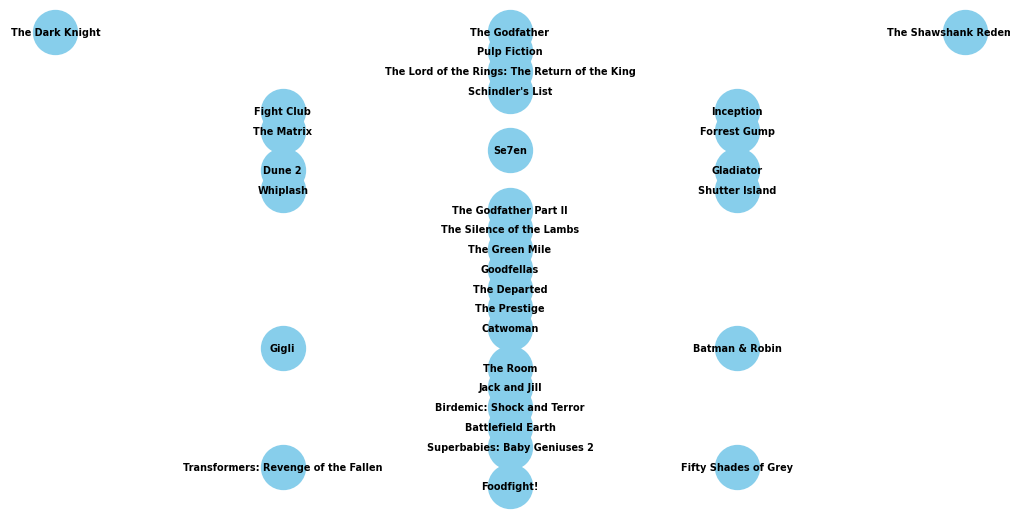

In [36]:
promethee1.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom1_overall.png', show=True)

<div style="background-color: #999900; color: white; text-align: center">
    <p>PROMETHEE II RANKING</p>
</div>

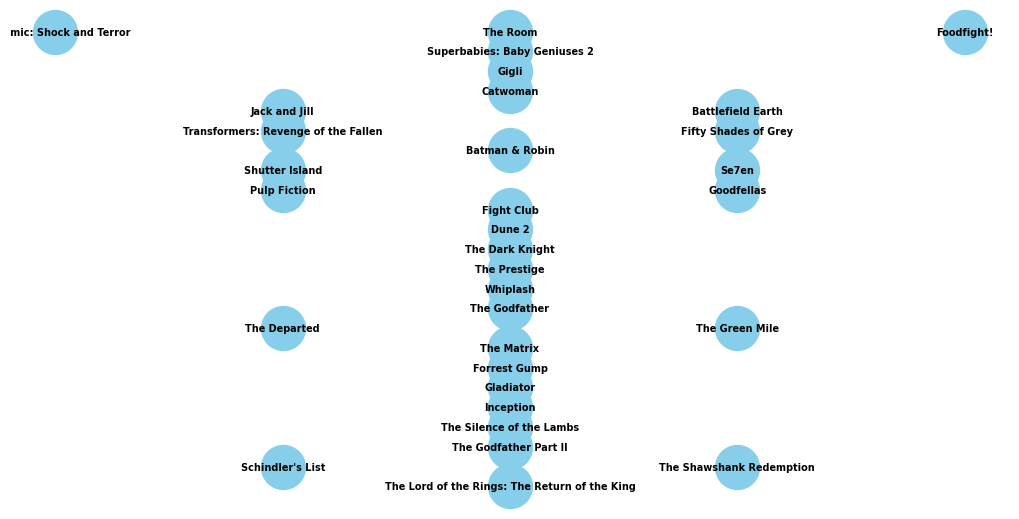

In [37]:
promethee2.plot_ranking(type='overall', savedir=f'{PROMETHEE_SAVE_DIR}/ranking_prom2_overall.png', show=True)

<div style="background-color: #999900; color: white; text-align: center">
    <p>ELECTRE CLASS ASSIGNMENT, iteration 1</p>
</div>

5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 2 2 2 2 2 3 3 2 


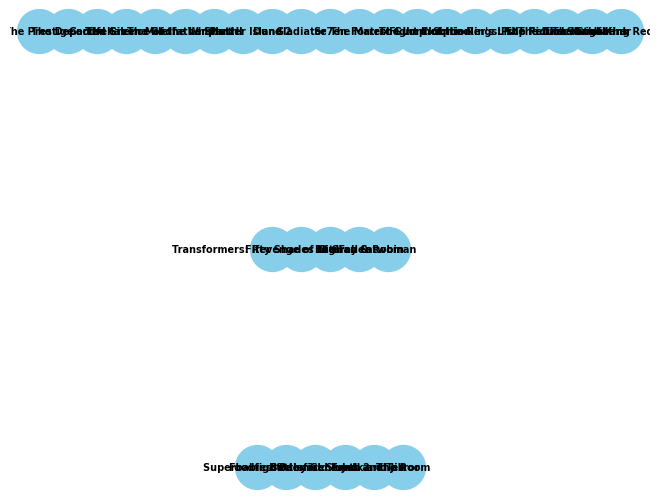

In [38]:
plot_electre_classes(electre_data, 'electre_class_pos')

<div style="background-color: #999900; color: white; text-align: center">
    <p>ELECTRE CLASS ASSIGNMENT, iteration 2</p>
</div>

5 4 5 4 5 5 5 5 4 4 4 5 4 5 4 4 4 4 4 4 5 2 3 2 1 2 1 3 2 3 3 1 


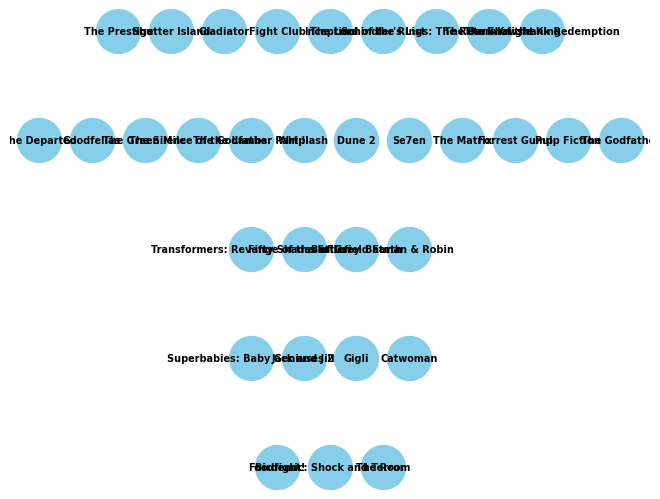

In [39]:

plot_electre_classes(electre_data2, 'electre_class_pos')

<p style="color: #992200">
The rankings obtained with PROMETHEE and ELECTRE are quite different. Mostly they differ in the granularity of the ranking. PROMETHEE gives us a more granular ranking, which is good because it gives us more information about the alternatives and makes it easier to make a decision. ELECTRE on the other hand, gives us a more general ranking, which also has its advantages. </p>


<p style="color: #992200">
Now, when we go back to our top movies, `The Godfather` and `The Lord of the Rings: The Return of the King`, we can see that they are ranked as 1st and 10th in the PROMETHEE ranking, and as 5th and 4th decision classes in the ELECTRE ranking. Note that PROMETHEE ranking is the lower the better, while ELECTRE ranking is the higher the better. So there is a slight disagreement in the ranking of these two movies, but we think that they're pretty close to each other in terms of quality. </p>

<p style="color: #992200">
As for the worst movies, `The Room`, `Birdemic: Shock and Terror` and `Foodfight!`, they are ranked as the worst movies in the data set in both PROMETHEE and ELECTRE rankings, which is expected. </p>

In [40]:
promethee2.overall_ranking.to_frame().to_csv('results/promethee/ranking_prom2_overall.csv')